#Dataset

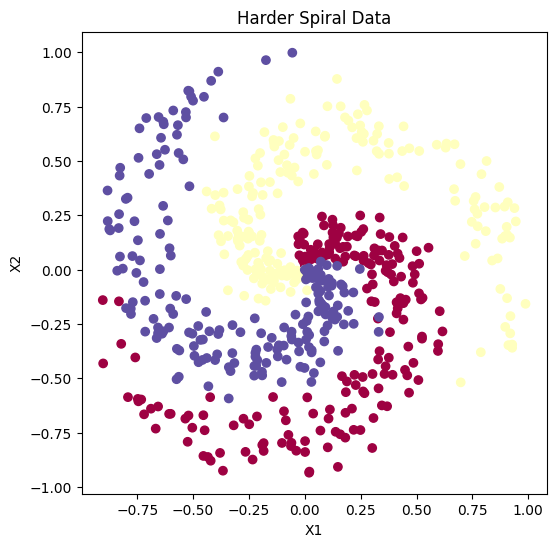

In [78]:

import numpy as np
import matplotlib.pyplot as plt
def generate_harder_spiral_data(points_per_class=200, noise=0.4,num_classes=3):
 N = points_per_class # points per class
 D = 2 # input dimension
 K = num_classes # number of classes
 X = np.zeros((N*K,D))
 y = np.zeros(N*K, dtype='uint8')
 for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N)
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
 return X, y
# Generate data
X, y = generate_harder_spiral_data()
# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Harder Spiral Data')
plt.show()

In [79]:
X

array([[-0.00000000e+00,  0.00000000e+00],
       [-3.21415018e-04,  5.01483599e-03],
       [ 3.50153219e-04,  1.00441497e-02],
       ...,
       [-3.87032454e-01,  9.11156619e-01],
       [-7.09229941e-01,  6.97830847e-01],
       [-5.57984061e-02,  9.98442055e-01]])

In [80]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [81]:
x1 = X[:, 0]  # x-coordinates #Select all rows at 0 index
x2 = X[:, 1]  # y-coordinates #Select all rows at 1 index

print("x1 (horizontal) stats:")
print("Mean:", np.mean(x1))
print("Min:", np.min(x1))
print("Max:", np.max(x1))

print("\nx2 (vertical) stats:")
print("Mean:", np.mean(x2))
print("Min:", np.min(x2))
print("Max:", np.max(x2))

x1 (horizontal) stats:
Mean: -0.02378386508817021
Min: -0.9037956163664902
Max: 0.9875700150417461

x2 (vertical) stats:
Mean: -0.027001411427438584
Min: -0.934472176307661
Max: 0.9984420553414697


#1. Data Preparation

In [82]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [83]:
# # 2. One-hot encode the labels
# y_cat = to_categorical(y)

In [84]:
#y_cat

*   Split into training and testing sets (e.g., 80%-20%).




In [85]:
#Split into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Only learn from training data
X_test_scaled = scaler.transform(X_test)        # Apply the same transformation

In [87]:
X_train_scaled.shape[1] # it returns columns count

2

In [88]:
print(X_train_scaled.shape[0]) # it returns rows count

480


In [89]:
X_train_scaled.shape # it returns rows,columns

(480, 2)

#2. Model Building

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model_mlp = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),  # 2D input
    Dense(64, activation='relu'),   # First hidden layer
    Dense(32, activation='relu'),   # Second hidden layer
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model_mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # use sparse_categorical since labels are integers 0,1,2
    metrics=['accuracy']
)

# Print summary
model_mlp.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,371 (9.26 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history = model_mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=300,
    batch_size=32,         # mini-batch size
    verbose=0              # show progress
)

In [92]:
final_train_acc = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]
print(f"Final Training Accuracy With Adam: {final_train_acc:.4f}")
print(f"Final Training Loss With Adam: {final_train_loss:.4f}")


final_val_acc = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Validation Accuracy With Adam: {final_val_acc:.4f}")
print(f"Final Validation Loss With Adam: {final_val_loss:.4f}")

Final Training Accuracy With Adam: 0.9844
Final Training Loss With Adam: 0.0544
Final Validation Accuracy With Adam: 0.9792
Final Validation Loss With Adam: 0.0509


In [93]:
import time
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, InputLayer

# Define function to train model with a given learning rate
def train_with_lr(lr):
    model = Sequential([
        InputLayer(shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer=SGD(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()  # Start timer

    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=0
    )

    # end_time = time.time()  # End timer
    # elapsed_time = end_time - start_time
    # print(f"Training time: {elapsed_time:.2f} seconds")

    return model, history

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1.0, 2.0, 5.0]
histories = []
models = []

# Train models
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, history = train_with_lr(lr)
    histories.append((lr, history))
    models.append((lr, model))  # Save model for plotting

    # Final results
    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")



Training with learning rate: 0.001
Final Training Accuracy: 0.5286
Final Training Loss: 0.9619
Final Validation Accuracy: 0.5000
Final Validation Loss: 0.9939

Training with learning rate: 0.01
Final Training Accuracy: 0.7995
Final Training Loss: 0.5702
Final Validation Accuracy: 0.6771
Final Validation Loss: 0.6029

Training with learning rate: 0.1
Final Training Accuracy: 0.9609
Final Training Loss: 0.1076
Final Validation Accuracy: 0.9688
Final Validation Loss: 0.0914

Training with learning rate: 1.0
Final Training Accuracy: 0.9479
Final Training Loss: 0.1380
Final Validation Accuracy: 0.9792
Final Validation Loss: 0.0803

Training with learning rate: 2.0
Final Training Accuracy: 0.4609
Final Training Loss: 0.9699
Final Validation Accuracy: 0.4583
Final Validation Loss: 0.9298

Training with learning rate: 5.0
Final Training Accuracy: 0.3698
Final Training Loss: 1.1523
Final Validation Accuracy: 0.3333
Final Validation Loss: 1.1351


#3. Model Evaluation

1. Plot Training and Validation Accuracy/Loss Curves

*   Adam



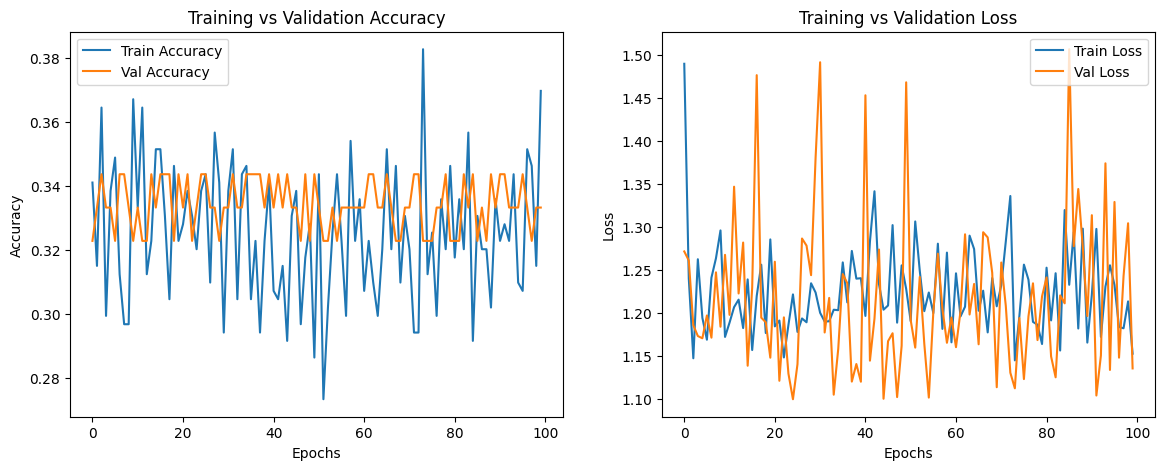

In [94]:
# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


*   SGD



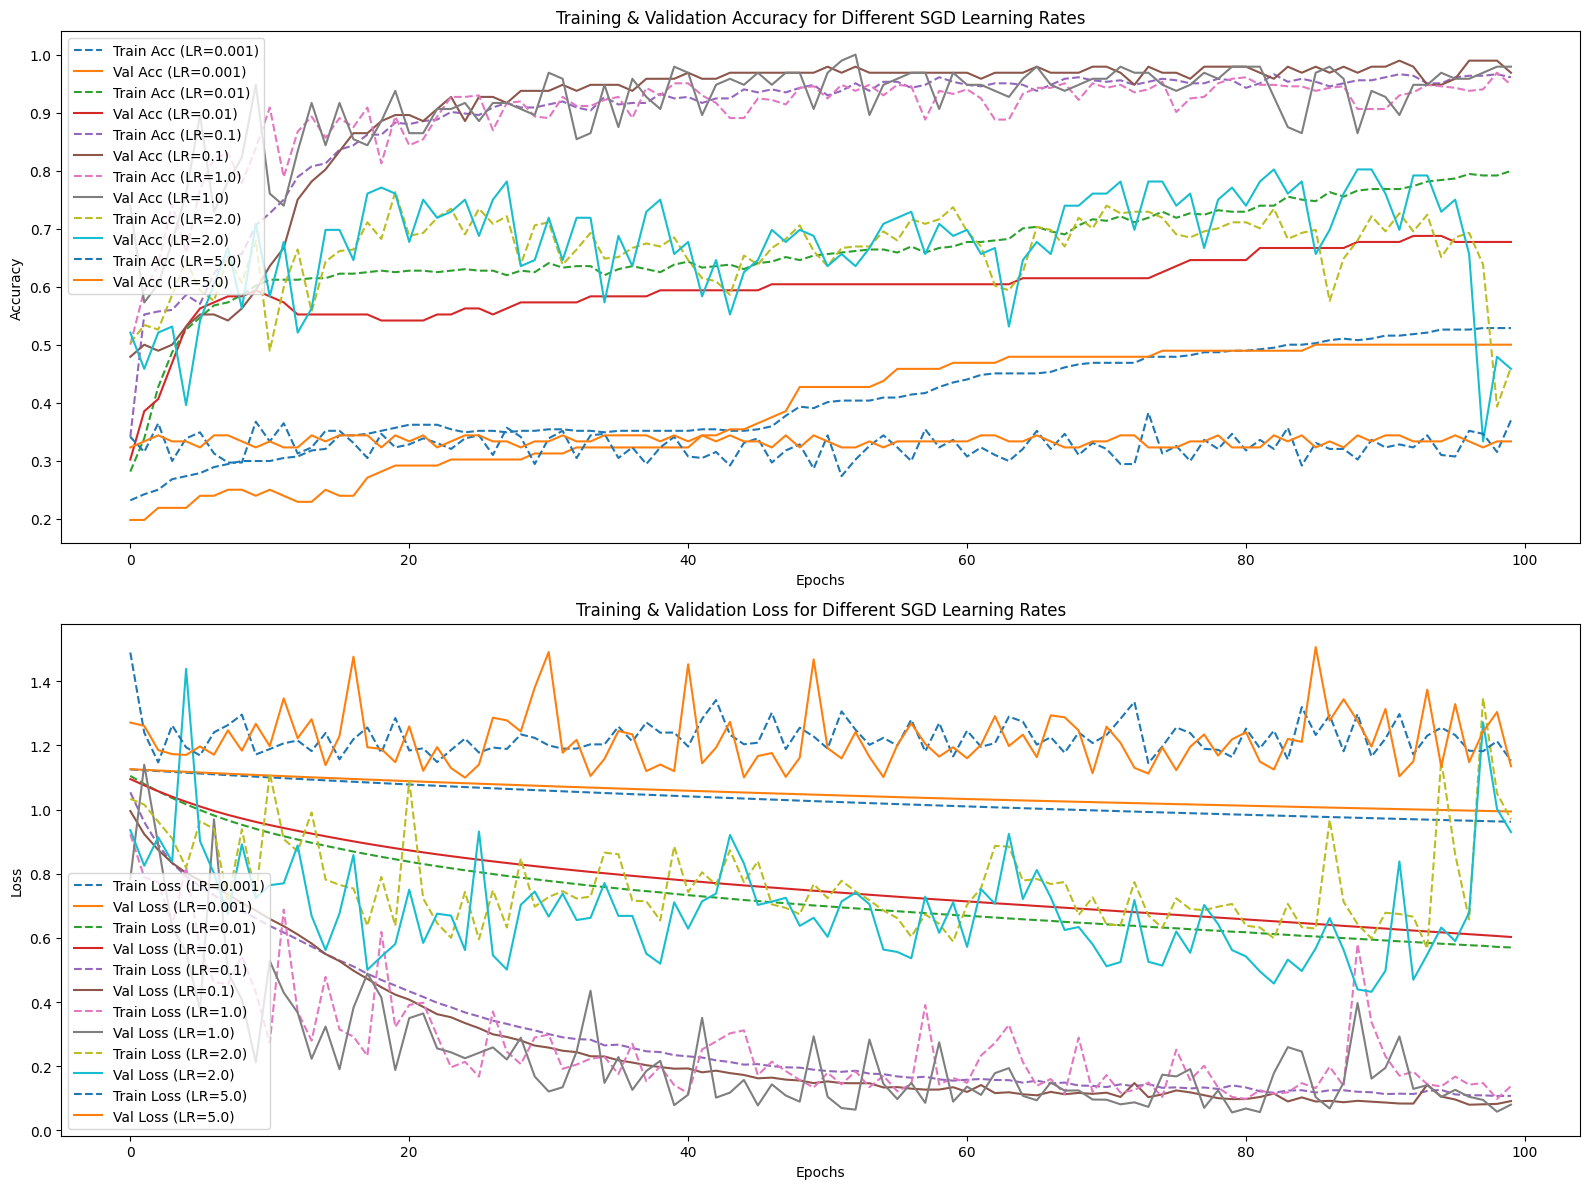

In [95]:
plt.figure(figsize=(16, 12))

# Accuracy subplot
plt.subplot(2, 1, 1)
for lr, history in histories:
    plt.plot(history.history['accuracy'], linestyle='--', label=f'Train Acc (LR={lr})')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (LR={lr})')
plt.title('Training & Validation Accuracy for Different SGD Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(2, 1, 2)
for lr, history in histories:
    plt.plot(history.history['loss'], linestyle='--', label=f'Train Loss (LR={lr})')
    plt.plot(history.history['val_loss'], label=f'Val Loss (LR={lr})')
plt.title('Training & Validation Loss for Different SGD Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


2. Plot the Decision Boundary

*   Adam

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


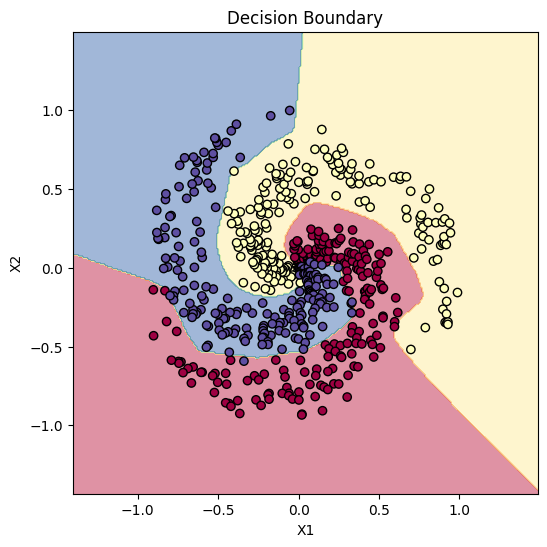

In [96]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)

    predictions = model.predict(grid_scaled)
    predicted_class = np.argmax(predictions, axis=1)
    zz = predicted_class.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, zz, alpha=0.5, cmap="Spectral")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral", edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()


# Use original X (unscaled for plotting) and y (one-hot to labels)
plot_decision_boundary(model_mlp, X, y)


*   SGD

Decision Boundary for Learning Rate: 0.001
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


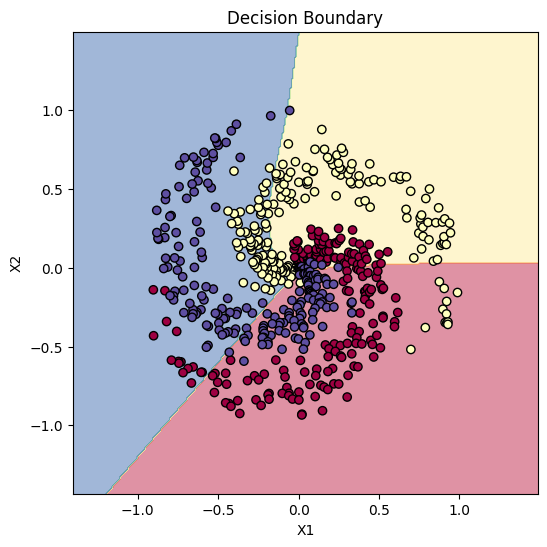

Decision Boundary for Learning Rate: 0.01
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


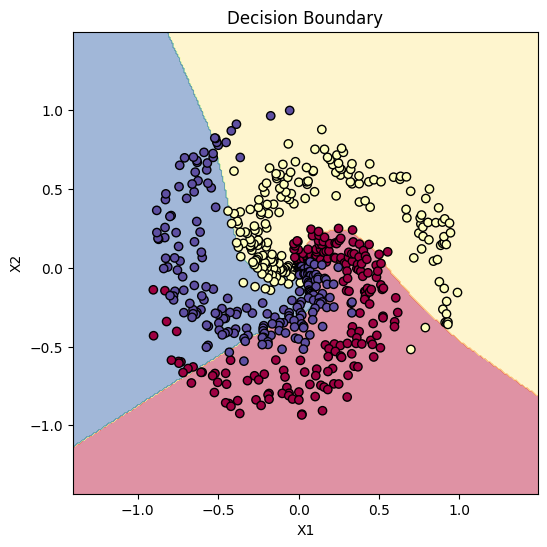

Decision Boundary for Learning Rate: 0.1
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


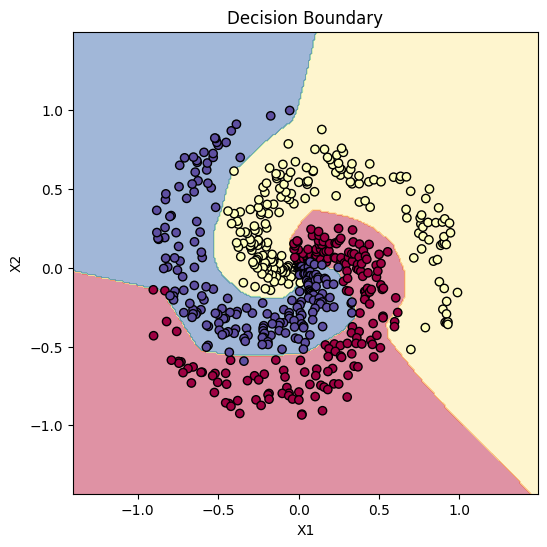

Decision Boundary for Learning Rate: 1.0
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


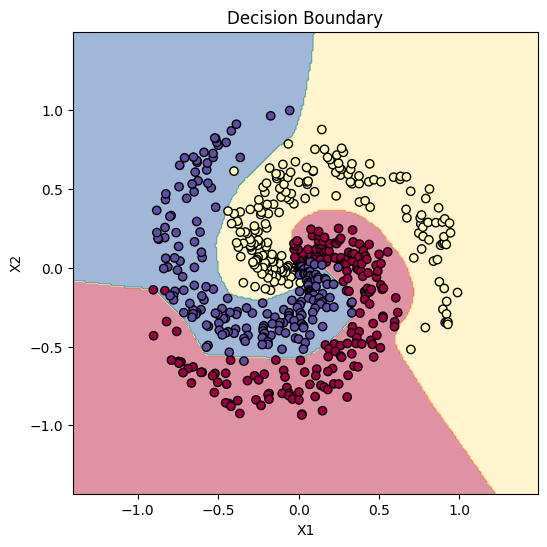

Decision Boundary for Learning Rate: 2.0
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


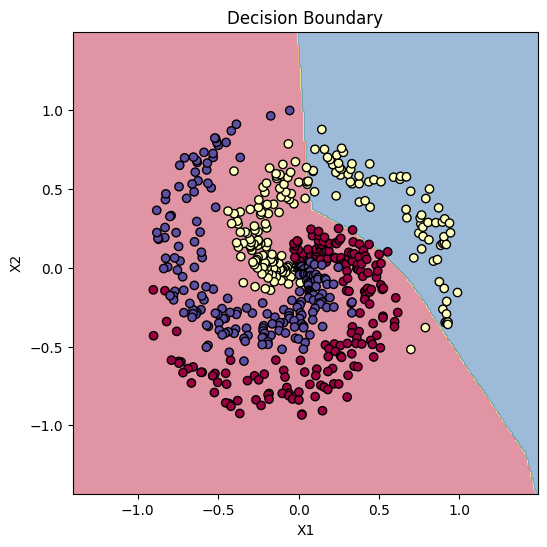

Decision Boundary for Learning Rate: 5.0
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


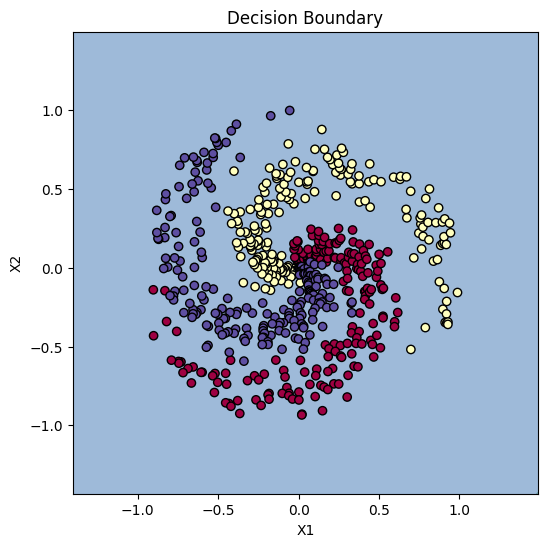

In [97]:
for lr, model in models:
    print(f"Decision Boundary for Learning Rate: {lr}")
    plot_decision_boundary(model, X, y)

#4. Reflection Questions

**● How did you decide the number of hidden layers and neurons?**

I used 2 hidden layers with 64 and 32 neurons. This is a good starting point for small classification tasks. I kept it simple, and it worked well with both Adam and SGD optimizers.

**● How did different learning rates affect the results?**

I tested different learning rates using **SGD**:

*   Very low (0.001, 0.01) → model learned slowly and performed poorly.

*   Medium (0.1, 1.0) → gave the best accuracy and loss.

*   High (2.0, 5.0) → training became unstable and accuracy dropped.

With **Adam**, I used the default adaptive learning rate and got very good performance without needing to tune it.

**● Did you encounter overfitting or underfitting? How did you deal with it?**

*   With Adam, validation loss was a little higher than training loss, which might be slight overfitting. If it got worse, I would add dropout or regularization.

*   With SGD, the model underfit at very low learning rates (0.001, 0.01) and performed badly at high rates (2.0, 5.0). It worked well only at medium learning rates (0.1, 1.0). So, it's important to choose a balanced learning rate — not too low, not too high.

**● If you had more time, how would you further improve the model?**

*   Try dropout or L2 regularization to reduce overfitting
*   Add more layers or neurons
*   Use learning rate schedules or callbacks
*   Try different optimizers like RMSprop
*   Do a grid search for best hyperparameters (like batch size, learning rate, etc.)